In [648]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

# Criar FRF a partir do CSV FRF_easy_to_import.xlsx

In [649]:
df = pd.read_excel("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF_easy_to_import.xlsx")

In [650]:
df.columns

Index(['Frequencia', 'Signal 2 (Real)', 'Signal 2 (Imag.)', 'Signal 3 (Real)',
       'Signal 3 (Imag.)', 'Signal 4 (Real)', 'Signal 4 (Imag.)'],
      dtype='object')

In [651]:
print(type(df['Frequencia'][0]))
print(type(df['Signal 2 (Real)'][0]))
print(type(df['Signal 2 (Imag.)'][0]))
print(type(df['Signal 3 (Real)'][0]))
print(type(df['Signal 3 (Imag.)'][0]))
print(type(df['Signal 4 (Real)'][0]))
print(type(df['Signal 4 (Imag.)'][0]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


# Plotando os gráfico das FRF experimentais

In [652]:
freq = df['Frequencia']
print(len(freq))

801


In [653]:
frf_2_andar = np.abs(df['Signal 2 (Imag.)']) + np.abs(df['Signal 2 (Real)'])
print(frf_2_andar.shape)

(801,)


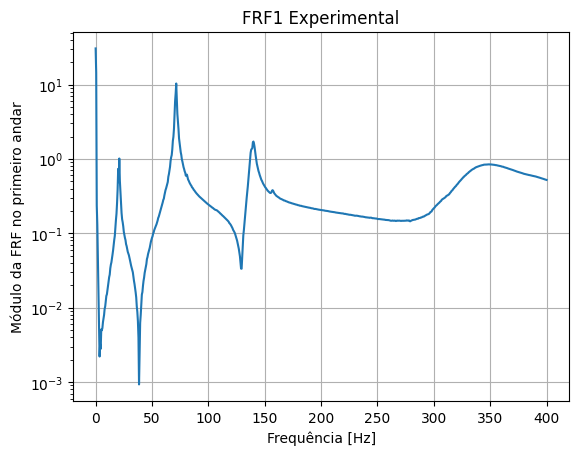

In [654]:
# Plotar gráfico da FRF do primeiro andar
frf_1_andar = np.abs(df['Signal 2 (Imag.)']) + np.abs(df['Signal 2 (Real)']) # Obtém-se o módulo da FRF

plt.plot(freq, frf_1_andar)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Módulo da FRF no primeiro andar')
plt.title('FRF1 Experimental')
plt.grid()
plt.yscale('log')
# plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF1_andar.png")
plt.show()

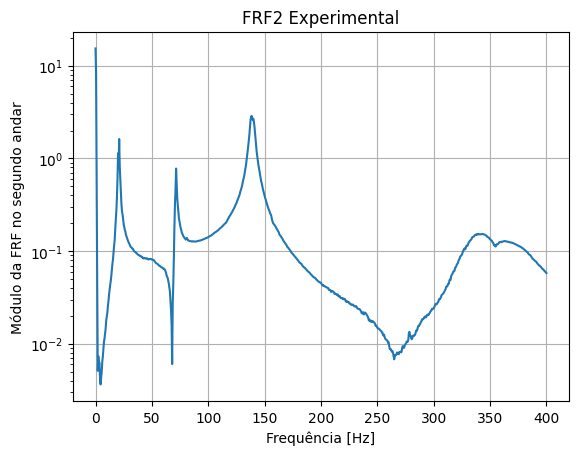

In [655]:
# Plotar gráfico da FRF do segundo andar
frf_2_andar = np.abs(df['Signal 3 (Imag.)']) + np.abs(df['Signal 3 (Real)']) # Obtém-se o módulo da FRF

plt.plot(freq, frf_2_andar)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Módulo da FRF no segundo andar')
plt.title('FRF2 Experimental')
plt.grid()
plt.yscale('log')
# plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF2_andar.png")
plt.show()

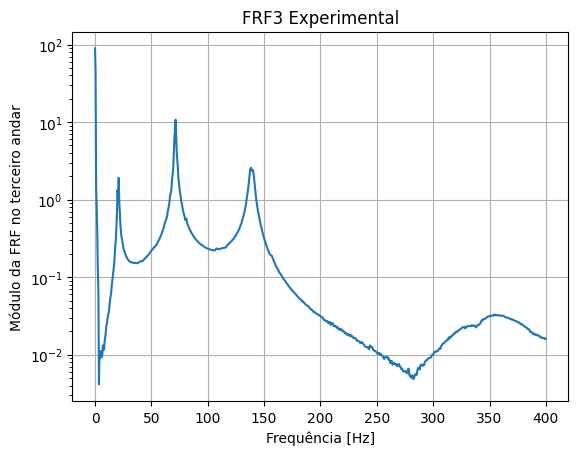

In [656]:
# Plotar gráfico da FRF do terceiro andar
frf_3_andar = np.abs(df['Signal 4 (Imag.)']) + np.abs(df['Signal 4 (Real)']) # Obtém-se o módulo da FRF

plt.plot(freq, frf_3_andar)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Módulo da FRF no terceiro andar')
plt.title('FRF3 Experimental')
plt.grid()
plt.yscale('log')
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF3_andar.png")
plt.show()

# Salvando as FRF de cada andar

In [657]:
frf_1_andar.to_excel('D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\frf_1_andar.xlsx')
frf_2_andar.to_excel('D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\frf_2_andar.xlsx')
frf_3_andar.to_excel('D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\frf_3_andar.xlsx')

# Amortecimentos no Primeiro andar

In [658]:
frf_1_andar = np.abs(df['Signal 2 (Imag.)']) + np.abs(df['Signal 2 (Real)']) 
freq = df['Frequencia']
print(frf_1_andar.shape)
print(freq.shape)

(801,)
(801,)


In [659]:
w_1 = []
w_2 = []
w_n = []

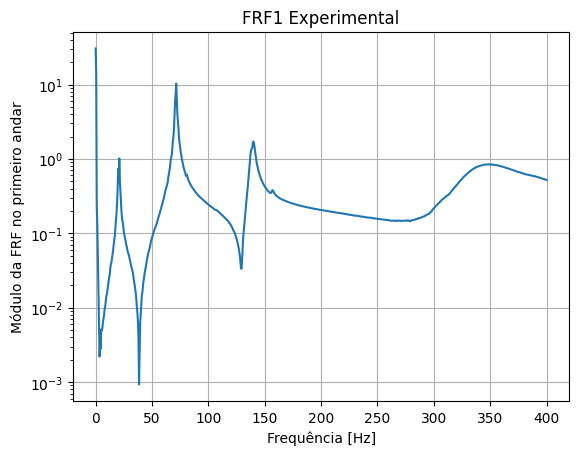

In [660]:
maior = frf_1_andar[2]
cont = 0
for i in range(2, 50):
    if frf_1_andar[i] > maior:
        maior = frf_1_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

1.0129031
0.7162306506948756
42
21.0


In [661]:
def linear_interpolation(x, y, y_interp):
    # Verifica se y_interp está fora do intervalo
    if y_interp < min(y) or y_interp > max(y):
        return None
    
    # Encontra os índices dos pontos mais próximos de y_interp
    idx = np.searchsorted(y, y_interp, side='right')
    idx -= 1
    
    # Calcula a diferença entre os valores de y próximos
    diff_y = y[idx+1] - y[idx]
    diff_x = x[idx+1] - x[idx]
    
    # Calcula a diferença proporcional entre y_interp e os valores de y
    diff_y_interp = y_interp - y[idx]
    
    # Calcula a proporção entre as diferenças de x e y
    proportion = diff_y_interp / diff_y
    
    # Interpola o valor de x correspondente a y_interp
    x_interp = x[idx] + proportion * diff_x
    
    return x_interp

In [662]:
x = [41*0.5, 21]
y = [0.4875502, 1.0129031]
y_interp = 0.7162306506948756

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

print(x_interp)

20.71764460679181


In [663]:
x = [19.5, 20]
y = [0.38753028, 0.73591509]
y_interp = 0.7162306506948756

x_interp = linear_interpolation(x, y, y_interp)

# w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 0.7162306506948756 é aproximadamente: 19.971748998894178


In [664]:
x = [21.5, 21]
y = [0.50667976, 1.0129031]
y_interp = 0.7162306506948756

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 0.7162306506948756 é aproximadamente: 21.29302525769073


In [665]:
print(maior/np.sqrt(2))

0.7162306506948756


In [666]:
maior = frf_1_andar[50]
cont = 0
for i in range(50, 200):
    if frf_1_andar[i] > maior:
        maior = frf_1_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

10.328243
7.303170663042491
143
71.5


In [667]:
x = [70.5, 71]
y = [5.987467, 7.587771]
y_interp = 7.303170663042491

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 7.303170663042491 é aproximadamente: 70.91107928963575


In [668]:
x = [72, 71.5]
y = [6.598632, 10.328243]
y_interp = 7.303170663042491

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 7.303170663042491 é aproximadamente: 71.90554796960829


In [669]:
print(freq[144])
print(frf_1_andar[144])
print(freq[143])
print(frf_1_andar[143])

72.0
6.598632
71.5
10.328243


In [670]:
print(freq[141])
print(frf_1_andar[141])
print(freq[142])
print(frf_1_andar[142])

70.5
5.9874670000000005
71.0
7.587771


In [671]:
print(maior/np.sqrt(2))

7.303170663042491


In [672]:
maior = frf_1_andar[50]
cont = 0
for i in range(200, len(frf_1_andar)):
    if frf_1_andar[i] > maior:
        maior = frf_1_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

1.7128028
1.2111344747153059
280
140.0


In [673]:
x = [137.5, 138]
y = [1.2081656, 1.3307448]
y_interp = 1.2111344747153059

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 1.2111344747153059 é aproximadamente: 137.512110026478


In [674]:
print(freq[275])
print(frf_1_andar[275])
print(freq[276])
print(frf_1_andar[276])

137.5
1.2081656
138.0
1.3307448


In [675]:
x = [284*0.5 ,283*0.5]
y = [1.0990418 ,1.2538949]
y_interp = 1.2111344747153059

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 1.2111344747153059 é aproximadamente: 141.6380677083142


In [676]:
print(freq[284])
print(frf_1_andar[284])
print(freq[283])
print(frf_1_andar[283])

142.0
1.0990418
141.5
1.2538949


In [677]:
print(maior/np.sqrt(2))

1.2111344747153059


## Calcular o amortecimento a partir da Banda de Meia-Potência

Antes disso converter Hz para rad/s

In [678]:
print(w_n)
print(w_1)
print(w_2)
q_si_1 = []

[21.0, 71.5, 140.0]
[20.71764460679181, 70.91107928963575, 137.512110026478]
[21.29302525769073, 71.90554796960829, 141.6380677083142]


In [679]:
for i in range(0, len(w_n)):
    w_n[i] = w_n[i]*2*np.pi

for i in range(0, len(w_1)):
    w_1[i] = w_1[i]*2*np.pi

for i in range(0, len(w_2)):
    w_2[i] = w_2[i]*2*np.pi

In [680]:
print(w_n)
print(w_1)
print(w_2)

[131.94689145077132, 449.2477494633404, 879.645943005142]
[130.1728001927627, 445.547451508886, 864.0140692776293]
[133.7880234445262, 451.79588250733974, 889.9382259621872]


In [681]:
for i in range(0,3):
    q_si_1.append((w_2[i] - w_1[i]) / (2 * w_n[i]))

**qsi** do primeiro andar obtido.

In [682]:
q_si_1

[0.013699539307117047, 0.0069543264333743905, 0.014735563149414927]

# Amortecimentos no Segundo andar

In [683]:
frf_2_andar = np.abs(df['Signal 3 (Imag.)']) + np.abs(df['Signal 3 (Real)']) 
freq = df['Frequencia']

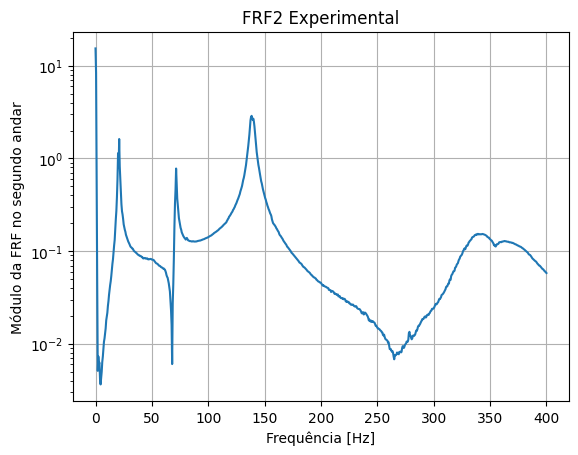

In [684]:
w_n = []
w_1 = []
w_2 = []

In [685]:
def linear_interpolation(x, y, y_interp):
    # Verifica se y_interp está fora do intervalo
    if y_interp < min(y) or y_interp > max(y):
        return None
    
    # Encontra os índices dos pontos mais próximos de y_interp
    idx = np.searchsorted(y, y_interp, side='right')
    idx -= 1
    
    # Calcula a diferença entre os valores de y próximos
    diff_y = y[idx+1] - y[idx]
    diff_x = x[idx+1] - x[idx]
    
    # Calcula a diferença proporcional entre y_interp e os valores de y
    diff_y_interp = y_interp - y[idx]
    
    # Calcula a proporção entre as diferenças de x e y
    proportion = diff_y_interp / diff_y
    
    # Interpola o valor de x correspondente a y_interp
    x_interp = x[idx] + proportion * diff_x
    
    return x_interp

In [686]:
maior = frf_2_andar[2]
cont = 0
for i in range(2, 50):
    if frf_2_andar[i] > maior:
        maior = frf_2_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

1.6221873
1.1470596401846962
42
21.0


In [687]:
x = [20.5 ,21]
y = [0.7906137 ,1.6221873]
y_interp = 1.1470596401846962

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 1.1470596401846962 é aproximadamente: 20.714320139663343


In [688]:
print(freq[41])
print(frf_2_andar[41])
print(freq[42])
print(frf_2_andar[42])

20.5
0.7906137
21.0
1.6221873


In [689]:
x = [43*0.5 ,21]
y = [0.82167842 ,1.6221873]
y_interp = 1.1470596401846962

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 1.1470596401846962 é aproximadamente: 21.296766014522728


In [690]:
print(freq[43])
print(frf_2_andar[43])

21.5
0.82167842


In [691]:
maior = frf_2_andar[50]
cont = 0
for i in range(50, 200):
    if frf_2_andar[i] > maior:
        maior = frf_2_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

0.7791773
0.5509615525766248
143
71.5


In [692]:
x = [71 ,71.5]
y = [0.46226258, 0.7791773]
y_interp = 0.5509615525766248

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 0.5509615525766248 é aproximadamente: 71.1399413895584


In [693]:
print(freq[142])
print(frf_2_andar[142])
print(freq[143])
print(frf_2_andar[143])

71.0
0.46226258
71.5
0.7791773


In [694]:
x = [72 ,71.5]
y = [0.5430588, 0.7791773]
y_interp = 0.5509615525766248

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 0.5509615525766248 é aproximadamente: 71.9832652829477


In [695]:
print(freq[144])
print(frf_2_andar[144])

72.0
0.5430588000000001


In [696]:
maior = frf_2_andar[50]
cont = 0
for i in range(200, len(frf_2_andar)):
    if frf_2_andar[i] > maior:
        maior = frf_2_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

2.8845606999999998
2.039692431714214
277
138.5


In [697]:
x = [136.5 ,137]
y = [1.8076991, 2.2046804]
y_interp = 2.039692431714214

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 2.039692431714214 é aproximadamente: 136.79219680084958


In [698]:
print(freq[273])
print(frf_2_andar[273])
print(freq[274])
print(frf_2_andar[274])

136.5
1.8076991
137.0
2.2046804


In [699]:
x = [141.5 ,141]
y = [1.875465, 2.218598]
y_interp = 2.039692431714214

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 2.039692431714214 é aproximadamente: 141.26069420353883


In [700]:
print(freq[283])
print(frf_2_andar[283])
print(freq[282])
print(frf_2_andar[282])

141.5
1.8754650000000002
141.0
2.218598


## Calcular o amortecimento a partir da Banda de Meia-Potência

Antes disso converter Hz para rad/s

In [701]:
print(w_n)
print(w_1)
print(w_2)
q_si_2 = []

[21.0, 71.5, 138.5]
[20.714320139663343, 71.1399413895584, 136.79219680084958]
[21.296766014522728, 71.9832652829477, 141.26069420353883]


In [702]:
for i in range(0, len(w_n)):
    w_n[i] = w_n[i]*2*np.pi

for i in range(0, len(w_1)):
    w_1[i] = w_1[i]*2*np.pi

for i in range(0, len(w_2)):
    w_2[i] = w_2[i]*2*np.pi

In [703]:
print(w_n)
print(w_1)
print(w_2)

[131.94689145077132, 449.2477494633404, 870.2211650443727]
[130.1519119497469, 446.98543449249024, 859.4907210759164]
[133.81152731289075, 452.28419478862736, 887.5671183016638]


In [704]:
for i in range(0,3):
    q_si_2.append((w_2[i] - w_1[i]) / (2 * w_n[i]))

**qsi** do segundo andar obtido.

In [705]:
q_si_2

[0.013867758925223432, 0.005897369883841241, 0.01613175957649553]

# Amortecimentos no Terceiro Andar

In [706]:
frf_3_andar = np.abs(df['Signal 4 (Imag.)']) + np.abs(df['Signal 4 (Real)'])
freq = df['Frequencia']

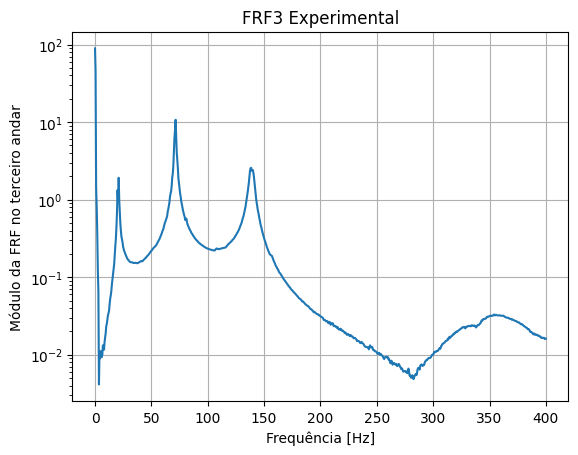

In [707]:
w_n = []
w_1 = []
w_2 = []

In [708]:
def linear_interpolation(x, y, y_interp):
    # Verifica se y_interp está fora do intervalo
    if y_interp < min(y) or y_interp > max(y):
        return None
    
    # Encontra os índices dos pontos mais próximos de y_interp
    idx = np.searchsorted(y, y_interp, side='right')
    idx -= 1
    
    # Calcula a diferença entre os valores de y próximos
    diff_y = y[idx+1] - y[idx]
    diff_x = x[idx+1] - x[idx]
    
    # Calcula a diferença proporcional entre y_interp e os valores de y
    diff_y_interp = y_interp - y[idx]
    
    # Calcula a proporção entre as diferenças de x e y
    proportion = diff_y_interp / diff_y
    
    # Interpola o valor de x correspondente a y_interp
    x_interp = x[idx] + proportion * diff_x
    
    return x_interp

In [709]:
maior = frf_3_andar[2]
cont = 0
for i in range(2, 50):
    if frf_3_andar[i] > maior:
        maior = frf_3_andar[i]
        cont = i
    
w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

1.9153889
1.3543844797994418
42
21.0


In [710]:
x = [20.5 ,21]
y = [0.9371715 ,1.9153889]
y_interp = 1.3543844797994418

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")

Valor de x para y = 1.3543844797994418 é aproximadamente: 20.713251665631507


In [711]:
print(freq[41])
print(frf_3_andar[41])
print(freq[42])
print(frf_3_andar[42])

20.5
0.9371715
21.0
1.9153889


In [712]:
x = [21.5 ,21]
y = [0.97668325 ,1.9153889]
y_interp = 1.3543844797994418

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")

Valor de x para y = 1.3543844797994418 é aproximadamente: 21.298818069434525


In [713]:
print(freq[43])
print(frf_3_andar[43])

21.5
0.97668325


In [714]:
maior = frf_3_andar[50]
cont = 0
for i in range(50, 200):
    if frf_3_andar[i] > maior:
        maior = frf_3_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

10.731814
7.588538453832727
143
71.5


In [715]:
x = [70.5 ,71]
y = [6.358449 ,8.02145]
y_interp = 7.588538453832727

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")

Valor de x para y = 7.588538453832727 é aproximadamente: 70.86984026282387


In [716]:
print(freq[141])
print(frf_3_andar[141])
print(freq[142])
print(frf_3_andar[142])

70.5
6.358449
71.0
8.02145


In [717]:
x = [144*0.5, 143*0.5]
y = [6.819267, 10.731814]
y_interp = 7.588538453832727

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")

Valor de x para y = 7.588538453832727 é aproximadamente: 71.90169172998654


In [718]:
print(freq[144])
print(frf_3_andar[144])
print(freq[143])
print(frf_3_andar[143])

72.0
6.819267
71.5
10.731814


In [719]:
maior = frf_3_andar[50]
cont = 0
for i in range(200, len(frf_3_andar)):
    if frf_3_andar[i] > maior:
        maior = frf_3_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

2.5768638
1.8221178671741352
277
138.5


In [720]:
x = [273*0.5, 274*0.5]
y = [1.6704992, 2.0205952]
y_interp = 1.8221178671741352

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")

Valor de x para y = 1.8221178671741352 é aproximadamente: 136.71653870249037


In [721]:
print(freq[273])
print(frf_3_andar[273])
print(freq[274])
print(frf_3_andar[274])

136.5
1.6704992
137.0
2.0205952


In [722]:
x = [141.5, 141]
y = [1.6434072, 1.9572694]
y_interp = 1.8221178671741352

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")

Valor de x para y = 1.8221178671741352 é aproximadamente: 141.21530393406064


In [723]:
print(freq[283])
print(frf_3_andar[283])
print(freq[282])
print(frf_3_andar[282])

141.5
1.6434072
141.0
1.9572694


## Calcular o amortecimento a partir da Banda de Meia-Potência

Antes disso converter Hz para rad/s

In [724]:
print(w_n)
print(w_1)
print(w_2)
q_si_3 = []

[21.0, 71.5, 138.5]
[20.713251665631507, 70.86984026282387, 136.71653870249037]
[21.298818069434525, 71.90169172998654, 141.21530393406064]


In [725]:
for i in range(0, len(w_n)):
    w_n[i] = w_n[i]*2*np.pi

for i in range(0, len(w_1)):
    w_1[i] = w_1[i]*2*np.pi

for i in range(0, len(w_2)):
    w_2[i] = w_2[i]*2*np.pi

In [726]:
print(w_n)
print(w_1)
print(w_2)

[131.94689145077132, 449.2477494633404, 870.2211650443727]
[130.145198529409, 445.2883390615392, 859.0153472239367]
[133.82442075416208, 451.77165303920737, 887.2819228273895]


In [727]:
for i in range(0,3):
    q_si_3.append((w_2[i] - w_1[i]) / (2 * w_n[i]))

**qsi** do terceiro andar obtido.

In [728]:
q_si_3

[0.01394205723340511, 0.007215744525613047, 0.01624102971686024]

# Obtenção das Massas e Rigidez

In [729]:
#dados do material: Aço 1020

E = 205e9 #módulo de elasticidade e, Pa
rho = 7870 #densidade em kg/m³

#propriedades dos andares--------------------------------------------------------------------------

a = 0.00965 #espessura do andar em m
b = 0.226 #comprimento do andar em m
c = .15180 #largura do andar em m

volume_andar=a*b*c #volume do andar
massa_andar = volume_andar*rho
m_andar = np.array([massa_andar,massa_andar,massa_andar])
print("massa de cada andar = ",round(massa_andar,3),"kg")

#massas adicionadas no experimento ----------------------------------------------------------------------------------

m1 = 1.635 #massa adicionada ao primeiro andar em kg
m2 = 1.187 #massa adicionada ao segundo andar em kg
m3 = 0 #massa adicionada ao terceiro andar em kg
m_adicionada = np.array([m1,m2,m3])

#propridedes da viga ----------------------------------------------------------------------------------------------------------------

#comprimentos
viga1 = 0.12
viga2 = 0.0903
viga3 = 0.0967
L = np.array([viga1,viga2,viga3]) #comprimentos das vigas em metros(Primeiro andar, Segundo andar, Terceiro andar)
print("[Viga1 Viga2 Viga3] = ",L)

#perfil da viga

h = 0.0032 #espessura das vigas no sentido do carregamento
e = 0.04966 #largura das vigas
A_st = h*e #area da seção transversal da viga
I = (e*(h**3))/12 #momento de inércia das vigas em m^4
#print("I =",I)

#massa das vigas

m_viga = np.array([0.0,0,0])

for i in range(len(L)):
  m_viga[i] = 4*((A_st*L[i])*rho)
m_viga[0] = 0
print("m_viga =",m_viga)

#massa final de cada andar ------------------------------------------------------------------------------------------------------

m_total = m_andar + m_adicionada # Essa é com a massa de cada andar 
print("massa total em cada andar =",m_total)

#Modelo considerando viga Engastada guiada -----------------------------------------------------------------------------------------

k_viga = np.array([0.0,0,0])
for i in range(len(k_viga)):                  #calculo da rigidez assossiada a uma viga em cada andar
  k_viga[i] = (12*E*I)/(L[i]**3)

print("k_viga =",k_viga)

#cálculo da frequencia natural ----------------------------------------------------------------------------------
w_n = np.array([0.0,0,0])
for i in range(len(k_viga)):
  w_n[i] = np.sqrt((4*k_viga[i])/m_total[i])

print("w_n =",w_n)

#Modelo considerando viga Engastada livre -----------------------------------------------------------------------------------------

k_viga_livre = np.array([0.0,0,0])                
for i in range(len(k_viga_livre)):                  #calculo da rigidez assossiada a uma viga em cada andar
  k_viga_livre[i] = (3*E*I)/(L[i]**3)

print("k_viga =",k_viga_livre)

#cálculo da frequencia natural ----------------------------------------------------------------------------------
w_n_livre = np.array([0.0,0,0])
for i in range(len(k_viga)):
  w_n_livre[i] = np.sqrt((4*k_viga_livre[i])/m_total[i])

print("w_n_livre =",w_n_livre)

massa de cada andar =  2.605 kg
[Viga1 Viga2 Viga3] =  [0.12   0.0903 0.0967]
m_viga = [0.         0.45173024 0.48374656]
massa total em cada andar = [4.24044708 3.79244708 2.60544708]
k_viga = [193048.65185185 453051.17416247 368919.05625675]
w_n = [426.73430636 691.26387444 752.583014  ]
k_viga = [ 48262.16296296 113262.79354062  92229.76406419]
w_n_livre = [213.36715318 345.63193722 376.291507  ]


# Matriz de Massa

In [730]:
M_matriz = np.zeros([3,3])

Massas de cada andar:

In [731]:
m1 = m_total[0]
m2 = m_total[1]
m3 = m_total[2]

In [732]:
M_matriz[0][0] = m1
M_matriz[1][1] = m2
M_matriz[2][2] = m3
print(M_matriz)

[[4.24044708 0.         0.        ]
 [0.         3.79244708 0.        ]
 [0.         0.         2.60544708]]


# Matriz de Rigidez (K)

In [733]:
K_matriz = np.zeros([3,3])

Rigidez de cada andar, usaremos o k da viga engastada livre

In [734]:
'''k1 = k_viga[0]
k2 = k_viga[1]
k3 = k_viga[2]'''

'k1 = k_viga[0]\nk2 = k_viga[1]\nk3 = k_viga[2]'

In [735]:
k1 = k_viga_livre[0]
k2 = k_viga_livre[1]
k3 = k_viga_livre[2]

In [736]:
K_matriz[0][0] = (k1 + k2)
K_matriz[0][1] = (-k2)
K_matriz[0][2] = 0
K_matriz[1][0] = (-k2)
K_matriz[1][1] = (k2 + k3)
K_matriz[1][2] = (-k3)
K_matriz[2][0] = 0
K_matriz[2][1] = (-k3)
K_matriz[2][2] = (k3)


In [737]:
K_matriz

array([[ 161524.95650358, -113262.79354062,       0.        ],
       [-113262.79354062,  205492.55760481,  -92229.76406419],
       [      0.        ,  -92229.76406419,   92229.76406419]])

# Autovalores e Autovetores

In [738]:
# Calcular autovalores e autovetores generalizados
auto_valores, auto_vetores = eig(K_matriz, M_matriz)

In [739]:
print(auto_valores)
print(auto_valores.shape)
print(type(auto_valores[0]))
print(auto_valores[1])
print(auto_valores[2])

[87107.60617648+0.j 36815.36553243+0.j  3752.03187556+0.j]
(3,)
<class 'numpy.complex128'>
(36815.36553242913+0j)
(3752.0318755579387+0j)


In [740]:
print(auto_vetores)
print(auto_vetores.shape)

[[ 0.41010149 -0.64179819 -0.46024466]
 [-0.75258335 -0.03066314 -0.59170685]
 [ 0.5152039   0.7662603  -0.66185939]]
(3, 3)


# Obter as Frequências Naturais a partir do Autovalor.

In [741]:
w_n_autovalor = []
for i in range(0, len(auto_valores)):
    w_n_autovalor.append((auto_valores[i]**0.5)*(2*np.pi))

In [742]:
print(w_n_autovalor)

[(1854.4191686754803+0j), (1205.5755367235618+0j), (384.8691741983719+0j)]


# Normalizando os Autovetores pela Massa dos andares

In [743]:
"""
for i in range(0, len(auto_vetores)):
    auto_vetores[:, i] = auto_vetores[:, i] / M_matriz[i,i] # Normalizando sem usar o np.sqrt
"""

'\nfor i in range(0, len(auto_vetores)):\n    auto_vetores[:, i] = auto_vetores[:, i] / M_matriz[i,i] # Normalizando sem usar o np.sqrt\n'

In [744]:
print(auto_vetores)

[[ 0.41010149 -0.64179819 -0.46024466]
 [-0.75258335 -0.03066314 -0.59170685]
 [ 0.5152039   0.7662603  -0.66185939]]


### Compactando todos os qsi

In [745]:
q_si = []
q_si.append(q_si_1)
q_si.append(q_si_2)
q_si.append(q_si_3)

# Código do Matlab convertido para o Python

In [746]:
print(f'K_matriz:\n {K_matriz}')
print(f'M_matriz:\n {M_matriz}')
print(f'freq:\n {freq[:]}')
print(f'freq[35]:\n {freq[35]}')


K_matriz:
 [[ 161524.95650358 -113262.79354062       0.        ]
 [-113262.79354062  205492.55760481  -92229.76406419]
 [      0.          -92229.76406419   92229.76406419]]
M_matriz:
 [[4.24044708 0.         0.        ]
 [0.         3.79244708 0.        ]
 [0.         0.         2.60544708]]
freq:
 0        0.0
1        0.5
2        1.0
3        1.5
4        2.0
       ...  
796    398.0
797    398.5
798    399.0
799    399.5
800    400.0
Name: Frequencia, Length: 801, dtype: float64
freq[35]:
 17.5


In [747]:
import numpy as np
from scipy.linalg import eigh

N = 3

# Massas
m1 = 2
m2 = m1
m3 = m1

# Rigidezas
k1 = 1000
k2 = k1
k3 = k1

# Montando matrizes de massa e rigidez
K = np.array([[k1 + k2, -k2, 0],
              [-k2, k2 + k3, -k3],
              [0, -k3, k3]])

Mv = np.array([m1, m2, m3])
M = np.diag(Mv)

# Extração dos autovalores e autovetores
W, V = eigh(K, M)
W = np.real(W)  # Para obter apenas os componentes reais dos autovalores

# Freq. Naturais e
wi = np.sqrt(W)
fi = wi / (2 * np.pi)

# Funcoes Resposta em Frequencia
f = np.arange(0.001, 10.001, 0.001)
w = 2 * np.pi * f
x = 1  # Considerando índices baseados em um
xf = 2  # Considerando índices baseados em um

# Funcoes Resposta em Frequencia - Com amortecimento
qsi = 0.01
N = len(w)
Vx = V[:, x-1]
Vxf = V[:, xf-1]
Hm = np.zeros((N, N))
H = np.zeros((N,))

# Shape das matrizes
print("Shape de K:", K.shape)
print("Shape de M:", M.shape)
print("Shape de W:", W.shape)
print("Shape de V:", V.shape)
print("Shape de wi:", wi.shape)
print("Shape de fi:", fi.shape)
print("Shape de f:", f.shape)
print("Shape de w:", w.shape)
print("Shape de Vx:", Vx.shape)
print("Shape de Vxf:", Vxf.shape)
print("Shape de Hm:", Hm.shape)
print("Shape de H:", H.shape)


Shape de K: (3, 3)
Shape de M: (3, 3)
Shape de W: (3,)
Shape de V: (3, 3)
Shape de wi: (3,)
Shape de fi: (3,)
Shape de f: (10000,)
Shape de w: (10000,)
Shape de Vx: (3,)
Shape de Vxf: (3,)
Shape de Hm: (10000, 10000)
Shape de H: (10000,)


## FRF 1 Numérica

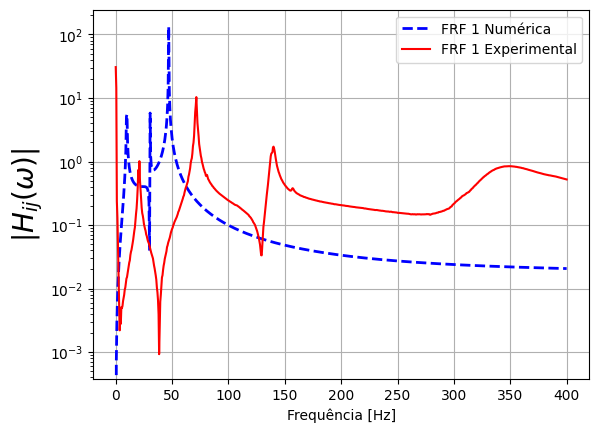

In [753]:
import numpy as np
from scipy.linalg import eig

N = 3

# Montando matrizes de massa e rigidez
K = K_matriz

M = M_matriz

# Extração dos autovalores e autovetores
W, V = eig(K, M)
W = np.real(W)  # Para obter apenas os componentes reais dos autovalores

# Freq. Naturais e
wi = np.sqrt(W)
fi = wi / (2 * np.pi)

# Funcoes Resposta em Frequencia
f = freq
w = 2 * np.pi * f
x = 0  # Considerando índices baseados em zero
xf = 1  # Considerando índices baseados em zero

# Funcoes Resposta em Frequencia - Com amortecimento
qsi = 0.001
Hm = np.zeros((len(w), N), dtype=complex)
H = np.zeros(len(w), dtype=complex) 

for j in range(len(w)):
    soma1 = 0
    for k in range(N):
        soma1 += - (w[j]**2)*(V[x, k] * V[xf, k] / (wi[k]**2 - w[j]**2 + 1j * 2 * qsi * wi[k] * w[j]))
        Hm[j, k] = - (w[j]**2)*(V[x, k] * V[xf, k] / (wi[k]**2 - w[j]**2 + 1j * 2 * qsi * wi[k] * w[j]))
    H[j] = soma1

# Y = 1j * w * H

# Plotting absolute value of H
plt.plot(freq, np.abs(H), 'b', linewidth=2, label='FRF 1 Numérica', ls='--')

frf_1_andar = np.abs(df['Signal 2 (Imag.)']) + np.abs(df['Signal 2 (Real)']) # Obtém-se o módulo da FRF

plt.plot(freq, frf_1_andar, 'r', label='FRF 1 Experimental')

plt.xlabel('Frequência [Hz]')
plt.ylabel(r'$|H_{ij}(\omega)|$', fontsize=20)
plt.grid()
plt.yscale('log')
plt.legend()
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF1_numerica_sem_ajuste_viga_livre.png")
plt.show()

## FRF 2 Numérica

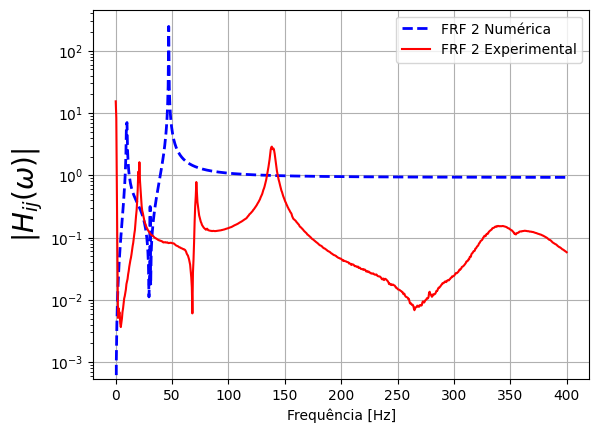

In [752]:
import numpy as np
from scipy.linalg import eig

N = 3

# Montando matrizes de massa e rigidez
K = K_matriz

M = M_matriz

# Extração dos autovalores e autovetores
W, V = eig(K, M)
W = np.real(W)  # Para obter apenas os componentes reais dos autovalores

# Freq. Naturais e
wi = np.sqrt(W)
fi = wi / (2 * np.pi)

# Funcoes Resposta em Frequencia
f = freq
w = 2 * np.pi * f
x = 1  # Considerando índices baseados em zero
xf = 1  # Considerando índices baseados em zero

# Funcoes Resposta em Frequencia - Com amortecimento
qsi = 0.001
Hm = np.zeros((len(w), N), dtype=complex)
H = np.zeros(len(w), dtype=complex)

for j in range(len(w)):
    soma1 = 0
    for k in range(N):
        soma1 += - (w[j]**2)*(V[x, k] * V[xf, k] / (wi[k]**2 - w[j]**2 + 1j * 2 * qsi * wi[k] * w[j]))
        Hm[j, k] = - (w[j]**2)*(V[x, k] * V[xf, k] / (wi[k]**2 - w[j]**2 + 1j * 2 * qsi * wi[k] * w[j]))
    H[j] = soma1

# Y = 1j * w * H

# Plotting absolute value of H
plt.plot(freq, np.abs(H), 'b', linewidth=2, label='FRF 2 Numérica', ls='--')

frf_2_andar = np.abs(df['Signal 3 (Imag.)']) + np.abs(df['Signal 3 (Real)']) # Obtém-se o módulo da FRF

plt.plot(freq, frf_2_andar, 'r', label='FRF 2 Experimental')

plt.xlabel('Frequência [Hz]')
plt.ylabel(r'$|H_{ij}(\omega)|$', fontsize=20)
plt.grid()
plt.yscale('log')
plt.legend()
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF2_numerica_sem_ajuste_viga_livre.png")
plt.show()

## FRF 3 Numérica

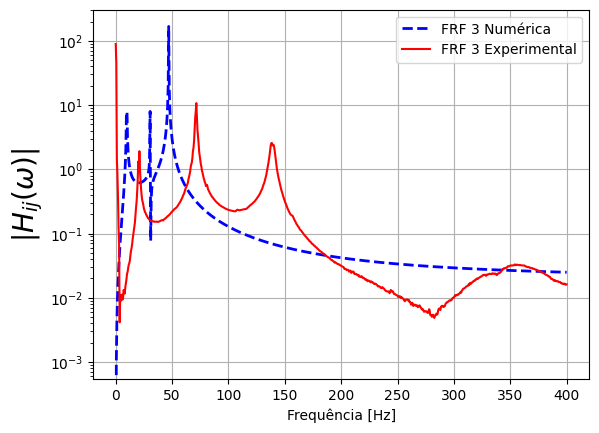

In [754]:
import numpy as np
from scipy.linalg import eig

N = 3

# Montando matrizes de massa e rigidez
K = K_matriz

M = M_matriz

# Extração dos autovalores e autovetores
W, V = eig(K, M)
W = np.real(W)  # Para obter apenas os componentes reais dos autovalores

# Freq. Naturais e
wi = np.sqrt(W)
fi = wi / (2 * np.pi)

# Funcoes Resposta em Frequencia
f = freq
w = 2 * np.pi * f
x = 2  # Considerando índices baseados em zero
xf = 1  # Considerando índices baseados em zero

# Funcoes Resposta em Frequencia - Com amortecimento
qsi = 0.001
Hm = np.zeros((len(w), N), dtype=complex)
H = np.zeros(len(w), dtype=complex)

for j in range(len(w)):
    soma1 = 0
    for k in range(N):
        soma1 += - (w[j]**2)*(V[x, k] * V[xf, k] / (wi[k]**2 - w[j]**2 + 1j * 2 * qsi * wi[k] * w[j]))
        Hm[j, k] = - (w[j]**2)*(V[x, k] * V[xf, k] / (wi[k]**2 - w[j]**2 + 1j * 2 * qsi * wi[k] * w[j]))
    H[j] = soma1

# Y = 1j * w * H

# Plotting absolute value of H
plt.plot(freq, np.abs(H), 'b', linewidth=2, label='FRF 3 Numérica', ls='--')

frf_3_andar = np.abs(df['Signal 4 (Imag.)']) + np.abs(df['Signal 4 (Real)']) # Obtém-se o módulo da FRF

plt.plot(freq, frf_3_andar, 'r', label='FRF 3 Experimental')

plt.xlabel('Frequência [Hz]')
plt.ylabel(r'$|H_{ij}(\omega)|$', fontsize=20)
plt.grid()
plt.yscale('log')
plt.legend()
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF3_numerica_sem_ajuste_viga_livre.png")
plt.show()